In [391]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud

mpl.style.use('seaborn-v0_8')
plt.rcParams.update({
    "text.usetex": False
})

In [392]:
# Read data
df = pd.read_csv("data_final.csv", sep=";", index_col="Id")

df

,Year,Interfaces,Category,Languages,Keywords
Id,,,,,
1,2020,"Text,Graphic",D,Python,"gnss,raspberry pi,autonomous robot,seed planti..."
2,2021,Text,A,C/C++,"automation,arduino,air quality,iot,monitoring"
3,2022,Graphic,D,Python,"crop yield,low-cost, weed detection,herbicide ..."
4,2021,"Text,Graphic",D,Python,"low-cost,multispectral imaging,uas,embedded el..."
5,2021,"Text,Graphic,Library",B,Python,"photogrammetry,phenotyping,uas,gis,orthomosaic"
6,2022,Text,A,"C/C++,Python","automation, arduino,monitoring,raspberry pi,pl..."
7,2022,Graphic,C,"Java,JavaScript","arduino,iot,irrigation,water use,automation"
8,2018,"Graphic,Plugin",E,"Java,C/C++,R","decision support,geostatistics,spatial analysi..."
9,2020,Text,A,"Java,Python","uas,autonomous photography,faas,machine learni..."


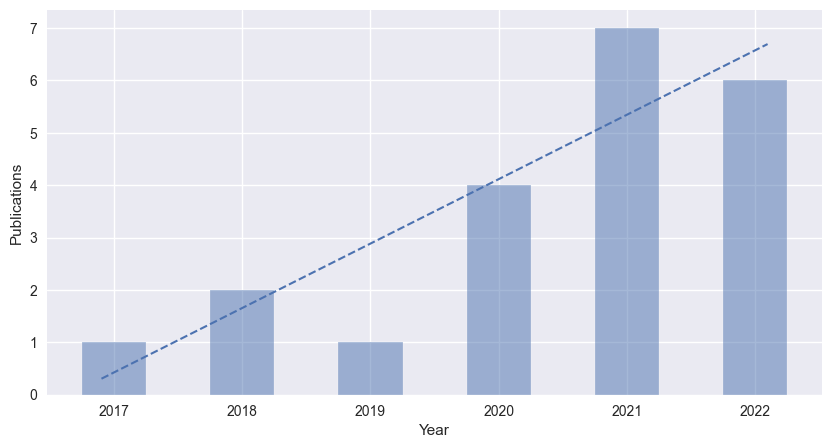

In [393]:
# Trend
s = df.Year.value_counts().sort_index()

x = s.index.to_numpy().reshape(-1, 1)
y = s.values
xlim1 = 2016.9
xlim2 = 2022.1

regr = linear_model.LinearRegression()
regr.fit(x, y)
ypred = regr.predict(np.array([[xlim1], [xlim2]]))

fig = plt.figure(figsize=(10,5))
ax = fig.subplots()
ax.bar(x.ravel(), y, width=0.5, alpha=0.5)
ax.set_xlabel("Year")
ax.set_ylabel("Number of publications")
ax.plot([xlim1, xlim2], ypred, linewidth=1.5, linestyle="dashed")
fig.savefig("trend.pdf", pad_inches=0, bbox_inches="tight")


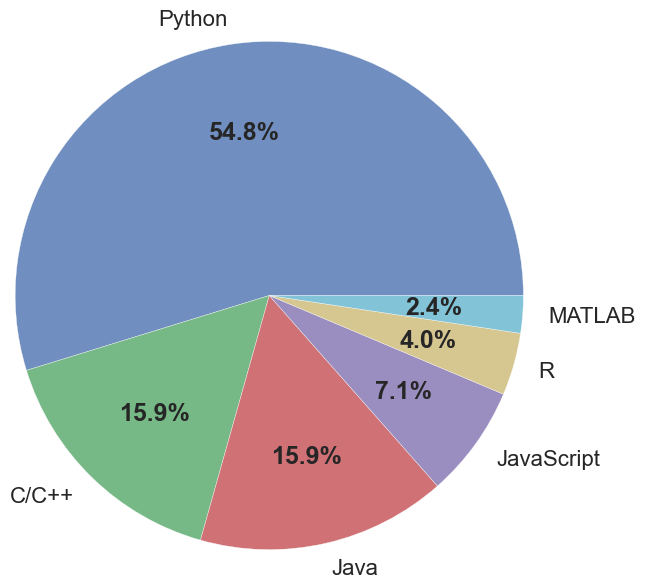

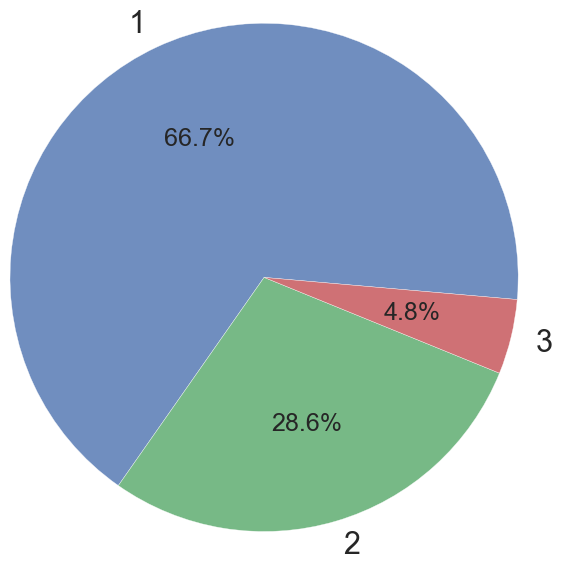

In [400]:
# Languages
plang_freq = {}
plang_mix = {}

for plangs in df.Languages:
    pls = plangs.split(",")
    if len(pls) in plang_mix:
        plang_mix[len(pls)] += 1
    else:
        plang_mix[len(pls)] = 1
    for pl in pls:
        pl = pl.strip()
        if pl in plang_freq:
            plang_freq[pl] += 1 / len(pls)
        else:
            plang_freq[pl] = 1 / len(pls)

fig, ax = plt.subplots()
_, labels, values = ax.pie(plang_freq.values(), labels=plang_freq.keys(), autopct=lambda x: f"{x:.1f}%", pctdistance=0.65, radius=1.5, wedgeprops={'alpha':0.8}) # , startangle=-45 # r"\textbf{" + f"{x:.1f}\%" + r"}"
[_.set_fontsize(16) for _ in labels]
[_.set_fontsize(18) for _ in values]
[_.set_fontweight("bold") for _ in values]
fig.savefig("langpercent.pdf", pad_inches=0, bbox_inches="tight")

fig, ax = plt.subplots()
_, labels, values = ax.pie(plang_mix.values(), labels=plang_mix.keys(), autopct=lambda x: f"{x:.1f}%", radius=1.5, startangle=-5, wedgeprops={'alpha':0.8})
[_.set_fontsize(20) for _ in labels]
[_.set_fontsize(18) for _ in values]
[_.set_fontweight("bold") for _ in values]
fig.savefig("langmix.pdf", pad_inches=0, bbox_inches="tight")



In [395]:
# Interfaces

In [396]:
# Categories

In [397]:
# World cloud
word_freq = {}

for kws in df.Keywords:
    for kw in kws.split(","):
        word = kw.strip()
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

wc = WordCloud(width=800, height=400, mode="RGBA", background_color=None, random_state=123)
wc.generate_from_frequencies(word_freq).to_file("wc.png");

![title](wc.png)